In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [21]:
df = pd.read_csv("singindex_health_data.csv", index_col=0)
metadf = pd.read_csv("singindex_health_metadata.csv")

In [20]:
df.describe()

,Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),"Birth rate, crude (per 1,000 people)",Age dependency ratio (% of working-age population),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Children (0-14) living with HIV,"Community health workers (per 1,000 people)",Children with fever receiving antimalarial drugs (% of children under age 5 with fever),...,"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant),"Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),Unmet need for contraception (% of married women ages 15-49),Use of insecticide-treated bed nets (% of under-5 population),Wanted fertility rate (births per woman),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Young people (ages 15-24) newly infected with HIV
count,20.000000,3.000000,49.000000,50.000000,4.000000,4.000000,4.000000,3.000000e+01,0.0,0.0,...,49.000000,49.000000,0.0,20.000000,19.000000,0.0,0.0,0.0,0.0,30.000000
mean,27.700000,71.252284,23.879245,63.172735,23.262458,8.416369,68.321173,1.830333e+06,NaN,NaN,...,73.469389,64.798472,NaN,51.850000,82.210526,NaN,NaN,NaN,NaN,714000.000000
std,22.143313,9.125491,3.952178,7.535403,5.353479,0.380716,5.587740,6.045259e+05,NaN,NaN,...,5.219945,5.657698,NaN,9.990917,4.756036,NaN,NaN,NaN,NaN,128589.161339
min,2.000000,62.733362,17.897170,54.000470,18.408850,7.957328,60.800612,4.600000e+05,NaN,NaN,...,62.650876,53.561788,NaN,35.000000,69.000000,NaN,NaN,NaN,NaN,460000.000000
25%,6.750000,66.437151,20.341382,55.243979,19.959261,8.216773,65.922335,1.525000e+06,NaN,NaN,...,69.959113,60.806726,NaN,45.250000,81.000000,NaN,NaN,NaN,NaN,622500.000000
50%,23.000000,70.140940,23.367895,63.138471,21.994853,8.425683,69.425129,2.000000e+06,NaN,NaN,...,73.653117,64.455120,NaN,53.000000,84.000000,NaN,NaN,NaN,NaN,715000.000000
75%,46.000000,75.511745,27.413364,68.722021,25.298050,8.625280,71.823967,2.300000e+06,NaN,NaN,...,77.588030,69.449339,NaN,57.500000,85.000000,NaN,NaN,NaN,NaN,820000.000000
max,67.000000,80.882551,31.568956,76.163975,30.651275,8.856782,73.633821,2.400000e+06,NaN,NaN,...,81.505548,73.886399,NaN,71.000000,87.000000,NaN,NaN,NaN,NaN,880000.000000


## Pre-processing

### Build index components

In [93]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [97]:
df[index_comps].to_csv("singindex_health_raw_components.csv")
df_index.to_csv("singindex_health_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_health_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [61]:
from scipy import interpolate

In [98]:
# interpolation
df_interp_index = df_index.interpolate()

<AxesSubplot:xlabel='Date'>

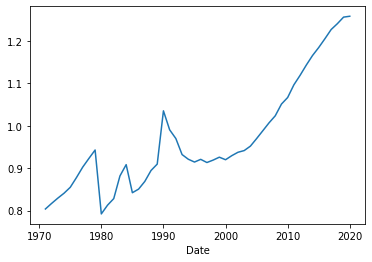

In [114]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [115]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(a.index[-20:-1], a.values[-20:-1], fill_value="extrapolate")

<AxesSubplot:>

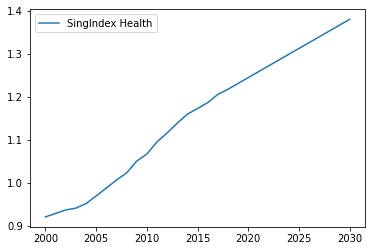

In [117]:
singindex = pd.DataFrame({"SingIndex Health": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

### Export

In [118]:
df_interp_index.to_csv("singindex_health_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_health_avg_interpolate.csv")
singindex.to_csv("singindex_health_avg_extrapolate_2000_2030.csv")